changes in dq and nlayers

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [2]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
no_layers = len(bs_true)
# no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


<IPython.core.display.Javascript object>


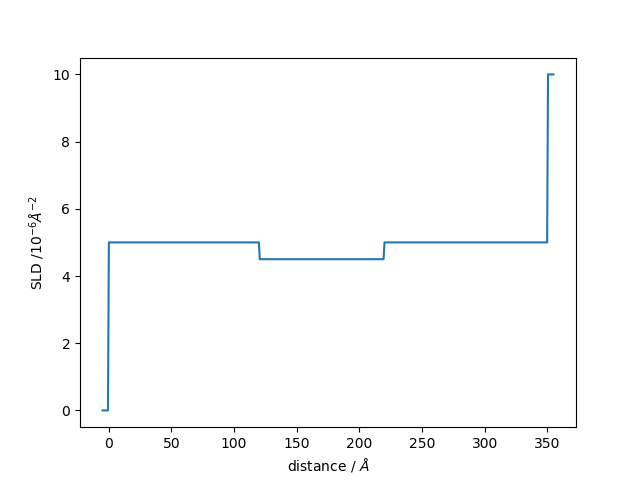

done


In [3]:
%matplotlib notebook
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

<IPython.core.display.Javascript object>


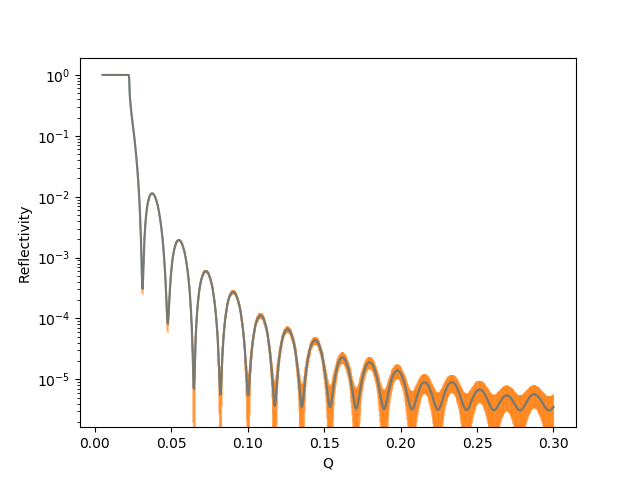

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


<IPython.core.display.Javascript object>


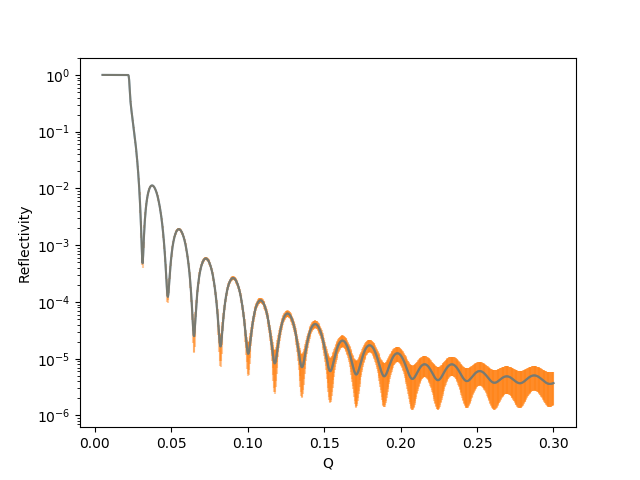

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


<IPython.core.display.Javascript object>


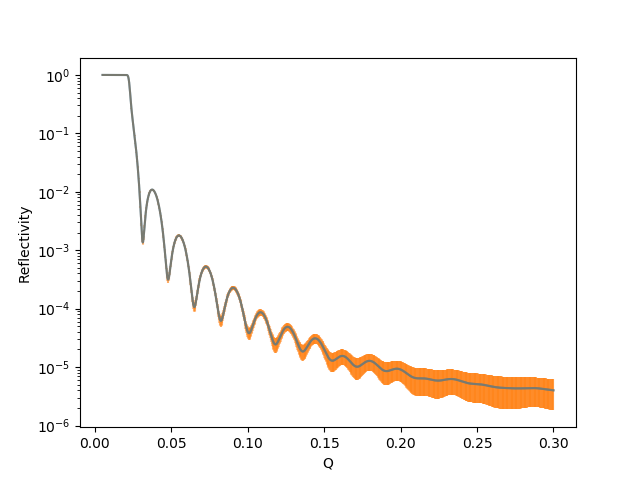

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


<IPython.core.display.Javascript object>


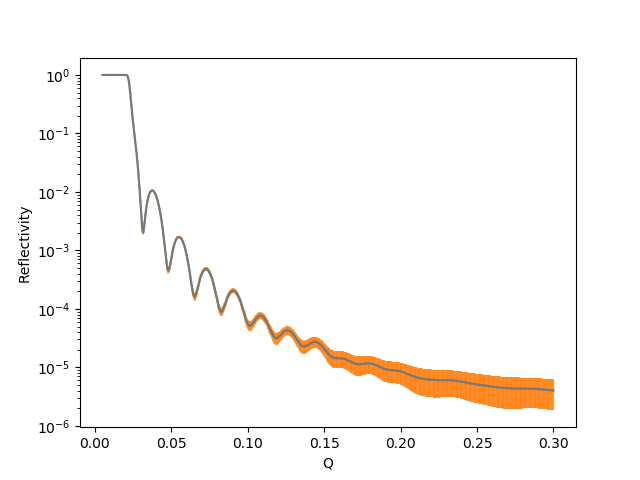

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


In [4]:
resolutions = [1.,3.,7.,9.]
datas = []
# resolution = 5.
for resolution in resolutions:
    model = ReflectModel(structure, bkg=3e-6, dq=resolution)

    q = np.linspace(0.005, 0.3, 1001)
    plt.figure(figI)
    figI+=1
    R = model(q, x_err=resolution)
    plt.plot(q, R)
    plt.xlabel('Q')
    plt.ylabel('Reflectivity')
    plt.yscale('log')
    #Q, R(Q), sig_Q, sig_R =
    import make_sim_data as msd
    sim_dR = msd.main(sim_q=q,sim_R=R)*10
    R = model(q, x_err=resolution)
    plt.errorbar(q,R,sim_dR, alpha=0.4)

    data = Data1D(data= (q,R,sim_dR))
    datas.append(data)


In [5]:
# data = Data1D(data= (q,R,sim_dR))

In [6]:
from seperat import seperateNLayer as snl
yss = []
ys = []
# yMCMCs = []
xs = [i for i in range(1,5)]
for data in datas:
    for i in range(1,5):
        y = snl(data, i)
    #     yMCMC = snl(data, i, doMCMC=True)
        print(i,y)#, yMCMC)
        ys.append(y)
#     #     yMCMCs.append(yMCMC)
#         xs.append(i)
    print(" ")
    yss.append(ys)

refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4
1 -41980.757287975975
2 -516.8056330580562
3 -212.05938899012386
4 -209.31743970216684
1 -42153.167703336934
2 699.8892690572975
3 991.2533101079202
4 985.3891517872534
1 -48759.350834791825
2 875.2631292424498
3 1027.4314983778888
4 1115.7359290294264
1 -45041.53971042113
2 -476.95763947205313
3 -359.04899431247816
4 -73.19620636168828


[1, 2, 3, 4] [-41980.757287975975, -516.8056330580562, -212.05938899012386, -209.31743970216684, -42153.167703336934, 699.8892690572975, 991.2533101079202, 985.3891517872534, -48759.350834791825, 875.2631292424498, 1027.4314983778888, 1115.7359290294264, -45041.53971042113, -476.95763947205313, -359.04899431247816, -73.19620636168828]


<IPython.core.display.Javascript object>


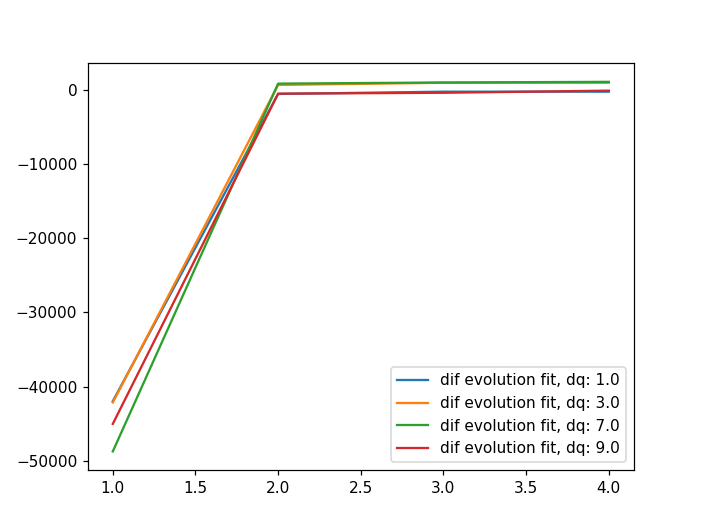

In [14]:
try:
    xs
    if not hasattr(yss, "__iter__"):
        print(xs, ys)#, yMCMCs)
        yss = ([[-41980.757287975975,-516.8056330580562,
                -212.05938899012386,-209.31743970216684],
               [-42153.167703336934,699.8892690572975,
               991.2533101079202,985.3891517872534],
               [-48759.350834791825,875.2631292424498,
               1027.4314983778888,1115.7359290294264],
               [-45041.53971042113,-476.95763947205313,
               -359.04899431247816,-73.19620636168828]])
except NameError:
#     print(xs, ys)#, yMCMCs)
    xs = [1,2,3,4]
    yss = ([[-41980.757287975975,-516.8056330580562,
            -212.05938899012386,-209.31743970216684],
           [-42153.167703336934,699.8892690572975,
           991.2533101079202,985.3891517872534],
           [-48759.350834791825,875.2631292424498,
           1027.4314983778888,1115.7359290294264],
           [-45041.53971042113,-476.95763947205313,
           -359.04899431247816,-73.19620636168828]])
plt.figure(10)
for i in range(len(yss)):
    plt.plot(xs, yss[i], label="dif evolution fit, dq: "+str(resolutions[i]))
#     plt.plot(xs, yMCMCs, label="mcmc fit")
    plt.legend()